# Examining the Impact of Pell Grant Distribution on Graduation Rates: A Comparative Study of HBCUs and PWIs

## Introduction
In recent years, financial aid has become a pivotal factor in shaping student outcomes in higher education. Specifically, Pell Grants and federal grant aid have been central to supporting low-income students in their pursuit of a college degree. While much research has focused on individual student-level data, fewer studies have examined the institutional-level impact of financial aid on graduation rates. This paper explores the relationship between financial aid distribution,Pell Grants and institutional graduation rates within 150% of normal time. The study also considers how institutional type (2-year vs. 4-year), control (public vs. private), and Historically Black College and University (HBCU) status influence these outcomes.

## Refining the Research QuestionHow does access to Pell Grants influence graduation rates for low-income students at HBCUs compared to PWIs, considering differences between 2-year and 4-year institutions, as well as public vs. private institutions?.


## Problem Statement
Federal financial aid, especially Pell Grants, plays a significant role in supporting students from low-income backgrounds in U.S. higher education. However, the impact of Pell Grants on graduation rates within 150% of normal time remains unclear, particularly when comparing institutions with differing characteristics, such as 2-year vs. 4-year institutions and public vs. private nonprofit institutions. Additionally, the unique challenges faced by Historically Black Colleges and Universities (HBCUs) in relation to Pell Grant distribution and graduation rates warrant further investigation. This analysis hypothesizes that the percentage of students receiving Pell Grants positively influences graduation rates, with variations across institutional types and particularly within HBCUs.

## Literature Review
Graduation rates serve as a critical metric for evaluating the effectiveness of higher education institutions. A substantial body of research indicates a complex relationship between financial aid and student success, particularly regarding Pell Grants. While some studies, such as those by Chen and DesJardins (2010), show that Pell Grant recipients may face lower graduation rates due to heightened financial need and the necessity of balancing work and academic responsibilities, other research highlights the positive impact of financial aid on persistence and graduation (Dynarski & Scott-Clayton, 2013).
Moreover, institutional characteristics significantly influence graduation rates. Research by Bailey and Dynarski (2011) demonstrates that 4-year institutions, particularly private non-profit colleges, generally report higher graduation rates compared to 2-year institutions. This disparity is attributed to differences in student preparation, available resources, and academic support systems. Additionally, the role of Historically Black Colleges and Universities (HBCUs) in promoting student success has been well-documented; studies such as those by Gasman and Commodore (2014) indicate that HBCUs positively impact graduation rates for African American students, even amidst financial challenges.
This study aims to address existing gaps in the literature by conducting an in-depth analysis of these factors at the institutional level, utilizing publicly available data from the Integrated Postsecondary Education Data System (IPEDS). By focusing on the interplay between financial aid, institutional type, and graduation outcomes, this research will contribute to the understanding of how these variables affect student success across diverse higher education environments.


## Data Importing and Cleaning 

In [3]:
import pandas as pd
import numpy as np


In [5]:
import matplotlib as mb
import seaborn as sn

In [7]:
import os
current_directory = os.getcwd()
print(current_directory)

/home/81e8adb4-b981-4fde-9a1a-464275ba01ce/IC_data


In [9]:
PELL_GR_DATA = pd.read_csv('/home/81e8adb4-b981-4fde-9a1a-464275ba01ce/IC_data/DATA_GRAD_PELL_MERGED.csv', encoding='ISO-8859-1')


In [11]:
PELL_GR_DATA .head ()

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
0,180203.0,Aaniiih Nakoda College,Harlem,MT,0.0,0.0,0.0,Four or more years,Public,34.0,29.0,85%,11.0,38%,5.0,0.0,0%,11.0,32%
1,222178.0,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,Four or more years,Private not-for-profit,940.0,280.0,30%,130.0,46%,444.0,309.0,70%,566.0,60%
2,222178.0,Abilene Christian University,Abilene,TX,0.0,0.0,1.0,Four or more years,Private not-for-profit,940.0,280.0,30%,130.0,46%,444.0,309.0,70%,566.0,60%
3,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,1.0,Four or more years,Public,477.0,219.0,46%,67.0,31%,209.0,80.0,38%,166.0,35%
4,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0.0,0.0,1.0,Four or more years,Public,488.0,276.0,57%,45.0,16%,176.0,65.0,37%,115.0,24%


In [13]:
PELL_GR_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INS_ ID              6136 non-null   float64
 1   INI_NAME             6136 non-null   object 
 2   CITY                 6136 non-null   object 
 3   STATE                6136 non-null   object 
 4   HBCU                 6136 non-null   float64
 5   DMV                  6136 non-null   float64
 6   PWI                  6136 non-null   float64
 7   IC_LEVEL             6136 non-null   object 
 8   CONTROL              6136 non-null   object 
 9   total_cohort         6136 non-null   float64
 10  pell_cohort          6136 non-null   float64
 11  pell_percent         6135 non-null   object 
 12  pell_complete_150    6136 non-null   float64
 13  pell_grad_rate       5939 non-null   object 
 14  no_aid_cohort        6136 non-null   float64
 15  no_aid_complete_150  6136 non-null   f

In [26]:
PELL_GR_DATA.isnull().sum() # Missing values count

INS_ ID                  1
INI_NAME                 1
CITY                     1
STATE                    1
HBCU                     1
DMV                      1
PWI                      1
IC_LEVEL                 1
CONTROL                  1
total_cohort             1
pell_cohort              1
pell_percent             2
pell_complete_150        1
pell_grad_rate         198
no_aid_cohort            1
no_aid_complete_150      1
no_aid_grad_rate       229
total_complete_150       1
Grad_rate                2
dtype: int64

In [15]:
PELL_GR_DATA.describe(include='all') # Statistical summary with all data types

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,6136.000000,6136,6136,6136,6136.000000,6136.000000,6136.000000,6136,6136,6136.000000,6136.000000,6135,6136.000000,5939,6136.000000,6136.000000,5908,6136.000000,6135
unique,NaN,2797,1580,51,NaN,NaN,NaN,2,2,NaN,NaN,97,NaN,101,NaN,NaN,98,NaN,97
top,NaN,Columbia College,New York,NY,NaN,NaN,NaN,Four or more years,Public,NaN,NaN,0%,NaN,0%,NaN,NaN,0%,NaN,33%
freq,NaN,10,68,490,NaN,NaN,NaN,4645,3161,NaN,NaN,196,NaN,185,NaN,NaN,260,NaN,144
mean,203452.020046,NaN,NaN,NaN,0.023631,0.036343,0.519557,NaN,NaN,650.960724,245.845339,NaN,108.207790,NaN,304.453064,190.450130,NaN,361.927803,NaN
std,86650.068880,NaN,NaN,NaN,0.151909,0.187157,0.499658,NaN,NaN,1057.888341,379.275120,NaN,202.195639,NaN,598.279013,480.295771,NaN,771.907073,NaN
min,100654.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN
25%,154371.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,93.000000,42.750000,NaN,14.000000,NaN,24.000000,10.000000,NaN,34.000000,NaN
50%,189556.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,300.500000,122.000000,NaN,49.000000,NaN,107.000000,48.000000,NaN,123.000000,NaN
75%,217477.250000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,715.000000,281.000000,NaN,111.000000,NaN,310.250000,153.000000,NaN,336.000000,NaN


In [17]:
PELL_GR_DATA.columns.tolist()

['INS_ ID',
 'INI_NAME',
 'CITY',
 'STATE',
 'HBCU',
 'DMV',
 'PWI',
 'IC_LEVEL',
 'CONTROL',
 'total_cohort',
 'pell_cohort',
 'pell_percent',
 'pell_complete_150',
 'pell_grad_rate',
 'no_aid_cohort',
 'no_aid_complete_150',
 'no_aid_grad_rate',
 'total_complete_150',
 'Grad_rate']

In [19]:
PELL_GR_DATA.dtypes # Data types of columns

INS_ ID                float64
INI_NAME                object
CITY                    object
STATE                   object
HBCU                   float64
DMV                    float64
PWI                    float64
IC_LEVEL                object
CONTROL                 object
total_cohort           float64
pell_cohort            float64
pell_percent            object
pell_complete_150      float64
pell_grad_rate          object
no_aid_cohort          float64
no_aid_complete_150    float64
no_aid_grad_rate        object
total_complete_150     float64
Grad_rate               object
dtype: object

In [21]:
PELL_GR_DATA.shape[0] # number of rows

6137

In [28]:
PELL_GR_DATA.shape[1] # number of Columns

19

In [23]:
print(f"Rows: {PELL_GR_DATA.shape[0]}, Columns: {PELL_GR_DATA.shape[1]}")

Rows: 6137, Columns: 19


### Convert the percentages from object to float by removing the '%' symbol and converting the values to decimals

In [25]:
PELL_GR_DATA['Grad_rate'] = pd.to_numeric(PELL_GR_DATA['Grad_rate'].str.rstrip('%'), errors='coerce') / 100


In [27]:
PELL_GR_DATA['pell_percent'] = pd.to_numeric(PELL_GR_DATA['pell_percent'].str.rstrip('%'), errors='coerce') / 100


In [29]:
PELL_GR_DATA['pell_grad_rate'] = pd.to_numeric(PELL_GR_DATA['pell_grad_rate'].str.rstrip('%'), errors='coerce') / 100


In [31]:
PELL_GR_DATA['no_aid_grad_rate'] = pd.to_numeric(PELL_GR_DATA['no_aid_grad_rate'].str.rstrip('%'), errors='coerce') / 100


In [33]:
PELL_GR_DATA.describe()

,INS_ ID,HBCU,DMV,PWI,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6135.000000,6136.000000,5939.000000,6136.000000,6136.000000,5908.000000,6136.000000,6135.000000
mean,203452.020046,0.023631,0.036343,0.519557,650.960724,245.845339,0.446665,108.207790,0.431837,304.453064,190.450130,0.513152,361.927803,0.473206
std,86650.068880,0.151909,0.187157,0.499658,1057.888341,379.275120,0.202332,202.195639,0.221012,598.279013,480.295771,0.240533,771.907073,0.218148
min,100654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154371.000000,0.000000,0.000000,0.000000,93.000000,42.750000,0.320000,14.000000,0.280000,24.000000,10.000000,0.340000,34.000000,0.310000
50%,189556.000000,0.000000,0.000000,1.000000,300.500000,122.000000,0.440000,49.000000,0.400000,107.000000,48.000000,0.520000,123.000000,0.460000
75%,217477.250000,0.000000,0.000000,1.000000,715.000000,281.000000,0.560000,111.000000,0.550000,310.250000,153.000000,0.690000,336.000000,0.610000
max,498906.000000,1.000000,1.000000,1.000000,11163.000000,9783.000000,1.000000,5178.000000,1.000000,6546.000000,5711.000000,1.000000,8458.000000,1.000000


In [35]:
PELL_GR =PELL_GR_DATA.round(2)

In [37]:
PELL_GR.describe()

,INS_ ID,HBCU,DMV,PWI,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6136.000000,6135.000000,6136.000000,5939.000000,6136.000000,6136.000000,5908.000000,6136.000000,6135.000000
mean,203452.020046,0.023631,0.036343,0.519557,650.960724,245.845339,0.446665,108.207790,0.431837,304.453064,190.450130,0.513152,361.927803,0.473206
std,86650.068880,0.151909,0.187157,0.499658,1057.888341,379.275120,0.202332,202.195639,0.221012,598.279013,480.295771,0.240533,771.907073,0.218148
min,100654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154371.000000,0.000000,0.000000,0.000000,93.000000,42.750000,0.320000,14.000000,0.280000,24.000000,10.000000,0.340000,34.000000,0.310000
50%,189556.000000,0.000000,0.000000,1.000000,300.500000,122.000000,0.440000,49.000000,0.400000,107.000000,48.000000,0.520000,123.000000,0.460000
75%,217477.250000,0.000000,0.000000,1.000000,715.000000,281.000000,0.560000,111.000000,0.550000,310.250000,153.000000,0.690000,336.000000,0.610000
max,498906.000000,1.000000,1.000000,1.000000,11163.000000,9783.000000,1.000000,5178.000000,1.000000,6546.000000,5711.000000,1.000000,8458.000000,1.000000


In [39]:
PELL_GR_CLEANED=PELL_GR_DATA.dropna()

In [41]:
PELL_GR_CLEANED.describe()

,INS_ ID,HBCU,DMV,PWI,total_cohort,pell_cohort,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate
count,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000
mean,199430.381276,0.023361,0.036437,0.519003,692.368550,261.416841,0.447896,115.286960,0.431789,324.140690,202.455021,0.513162,385.018480,0.471804
std,80898.150165,0.151061,0.187390,0.499682,1080.735503,386.762391,0.172261,207.175902,0.213558,612.751392,493.350818,0.234786,792.405427,0.202327
min,100654.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.030000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,153922.000000,0.000000,0.000000,0.000000,125.000000,57.000000,0.330000,20.000000,0.280000,35.000000,15.000000,0.340000,48.000000,0.320000
50%,188225.000000,0.000000,0.000000,1.000000,332.000000,134.000000,0.440000,53.000000,0.400000,121.000000,57.000000,0.520000,139.500000,0.460000
75%,215704.000000,0.000000,0.000000,1.000000,759.000000,303.000000,0.560000,120.000000,0.550000,332.000000,165.250000,0.690000,362.000000,0.610000
max,498571.000000,1.000000,1.000000,1.000000,11163.000000,9783.000000,0.970000,5178.000000,1.000000,6546.000000,5711.000000,1.000000,8458.000000,1.000000


In [43]:
PELL_GR_CLEANED.isnull().sum() # Missing values count

INS_ ID                0
INI_NAME               0
CITY                   0
STATE                  0
HBCU                   0
DMV                    0
PWI                    0
IC_LEVEL               0
CONTROL                0
total_cohort           0
pell_cohort            0
pell_percent           0
pell_complete_150      0
pell_grad_rate         0
no_aid_cohort          0
no_aid_complete_150    0
no_aid_grad_rate       0
total_complete_150     0
Grad_rate              0
dtype: int64

# Data Description

## Data Sources

The data for this study is obtained from the Integrated Postsecondary Education Data System (IPEDS), a U.S. Department of Education program that provides comprehensive data on U.S. colleges, universities, and technical and vocational institutions. The specific surveys used in this analysis are as follows:

- **Graduation Rates (GR) Survey**: Provides institutional-level data on graduation rates within 150% of normal time for first-time, full-time undergraduates.
- **Student Financial Aid (SFA) Survey**: Contains data on the percentage of students receiving Pell Grants and federal grant aid.
- **Institutional Characteristics (IC) Survey**: Includes data on institutional type (2-year vs. 4-year), control (public vs. private), and HBCU status.

## Dataset

This study uses institutional-level daom the 2022-2023 IPEDS database. The data is aggregated at the institutional level, meaning individual student data is not available. Instead, the analysis is based on i al averages to identify trends and relationships across various institutions.

## Variables

### Dependent Variable:

- **GR150UG**: Graduation rate within 150% of normal time for first-time, full-time undergraduates (Percentage).

### Independent Variables:

- **PELLPCT**: Percentage of undergraduates receiving Pell Grants (Continuous).
- **FEDGRNTPCT**: Percentage of undergraduates receiving federal grant aid (Continuous).
- **INSTLEVEL**: Institutional level (2-year vs. 4-year) (Binary: 1 = 4-year, 0 = 2-year).
- **CONTROL**: Institutional control (Public, Private Nonprofit, Private Foollment size (Continuous).

### Control Variable:

- **HBCU**: Historically Black College or University status (Binary: 1 = Yes, 0 = No).

## Data Columns

The dataset includes the following columns:

- **INS_ID**: Institution ID
- **INI_NAME**: Institution name
- **CITY**: City where the institution is located
- **STATE**: State where the institution is located
- **HBCU**: HBCU status (Binary: 1 = Yes, 0 = No)
- **DMV**: Indicator for institutions in the D.C., Maryland, Virginia area (if applicable)
- **PWI**: Indicator for Predominantly White Institutions (if applicable)
- **IC_LEVEL**: Institutional level (2-year vs. 4-year)
- **CONTROL**: Institutional control (Public, Private Nonprofit, Private For-Profit)
- **total_cohort**: Total number of students in the cohort
- **pell_cohort**: Number of students receiving Pell Grants in the cohort
- **pell_percent**: Percentage of students receiving Pell Grants
- **pell_complete_150**: Number of Pell Grant recipients who graduate within 150% of normal time
- **pell_grad_rate**: Graduation rate for Pell Grant recipients within 150% of normal time
- **no_aid_cohort**: Number of students not receiving Pell Grants in the cohort
- **no_aid_complete_150**: Number of non-Pell Grant recipients who graduate within 150% of normal time
- **no_aid_grad_rate**: Graduation rate for non-Pell Grant recipients within 150% of normal time
- **total_complete_150**: Total number of students who graduate within 150% of normal time
- **Grad_rate**: Overall graduation rate within 150% of normal time
ion is located
- **HBCU**: HBCU status


## Understanding the PELL_GR_CLEANED Dataset

In [162]:
# Checking first elements of the DataFrame PELL_GR_CLEANED with .head() method
PELL_GR_CLEANED.head()

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,...,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate,HBCU_Label,CONTROL_Label
0,180203.0,Aaniiih Nakoda College,Harlem,MT,0,0,0,Four or more years,Public,34.0,...,0.85,11.0,0.38,5.0,0.0,0.00,11.0,0.32,NaN,NaN
1,222178.0,Abilene Christian University,Abilene,TX,0,0,0,Four or more years,Private not-for-profit,940.0,...,0.30,130.0,0.46,444.0,309.0,0.70,566.0,0.60,NaN,NaN
2,222178.0,Abilene Christian University,Abilene,TX,0,0,1,Four or more years,Private not-for-profit,940.0,...,0.30,130.0,0.46,444.0,309.0,0.70,566.0,0.60,NaN,NaN
3,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0,0,1,Four or more years,Public,477.0,...,0.46,67.0,0.31,209.0,80.0,0.38,166.0,0.35,NaN,NaN
4,138558.0,Abraham Baldwin Agricultural College,Tifton,GA,0,0,1,Four or more years,Public,488.0,...,0.57,45.0,0.16,176.0,65.0,0.37,115.0,0.24,NaN,NaN


In [164]:
# Checking last elements of the DataFrame  PELL_GR_CLEANED with .tail() method
PELL_GR_CLEANED.tail()

,INS_ ID,INI_NAME,CITY,STATE,HBCU,DMV,PWI,IC_LEVEL,CONTROL,total_cohort,...,pell_percent,pell_complete_150,pell_grad_rate,no_aid_cohort,no_aid_complete_150,no_aid_grad_rate,total_complete_150,Grad_rate,HBCU_Label,CONTROL_Label
6131,206695.0,Youngstown State University,Youngstown,OH,0,0,1,Four or more years,Public,2124.0,...,0.42,391.0,0.44,883.0,573.0,0.65,1135.0,0.53,NaN,NaN
6132,206695.0,Youngstown State University,Youngstown,OH,0,0,0,Four or more years,Public,40.0,...,0.65,8.0,0.31,11.0,2.0,0.18,10.0,0.25,NaN,NaN
6133,206695.0,Youngstown State University,Youngstown,OH,0,0,1,Four or more years,Public,40.0,...,0.65,8.0,0.31,11.0,2.0,0.18,10.0,0.25,NaN,NaN
6134,126119.0,Yuba College,Marysville,CA,0,0,0,At least 2 but less than 4 years,Public,307.0,...,0.53,54.0,0.33,143.0,45.0,0.31,99.0,0.32,NaN,NaN
6135,204255.0,Zane State College,Zanesville,OH,0,0,1,Four or more years,Public,202.0,...,0.48,39.0,0.40,84.0,57.0,0.68,107.0,0.53,NaN,NaN


In [166]:
# State the shape of the data frame PELL_GR_CLEANED
PELL_GR_CLEANED.shape  # Returns (rows, columns)


(5736, 21)

In [53]:
# How many rows does the data frame PELL_GR_CLEANED have?
PELL_GR_CLEANED.shape[0]

5736

In [55]:
# How many columns does the data frame ELL_GR_CLEANED have?
PELL_GR_CLEANED.shape[1]

19

In [57]:
# What is the total number of data points expected in the data set (rows x columns)?
PELL_GR_CLEANED.shape[0] * PELL_GR_CLEANED.shape[1]

108984

In [121]:
PELL_GR_CLEANED.loc[:, "HBCU"] = PELL_GR_CLEANED["HBCU"].astype(float).astype(int)
PELL_GR_CLEANED.loc[:, "PWI"] = PELL_GR_CLEANED["PWI"].astype(float).astype(int)
PELL_GR_CLEANED.loc[:, "DMV"] = PELL_GR_CLEANED["DMV"].astype(float).astype(int)


In [123]:
PELL_GR_CLEANED.loc[:, "HBCU"] = PELL_GR_CLEANED["HBCU"].astype(str)
PELL_GR_CLEANED.loc[:, "PWI"] = PELL_GR_CLEANED["PWI"].astype(str)
PELL_GR_CLEANED.loc[:, "DMV"] = PELL_GR_CLEANED["DMV"].astype(str)




In [95]:
# Checking for missing values
PELL_GR_CLEANED.isnull().sum()

INS_ ID                0
INI_NAME               0
CITY                   0
STATE                  0
HBCU                   0
DMV                    0
PWI                    0
IC_LEVEL               0
CONTROL                0
total_cohort           0
pell_cohort            0
pell_percent           0
pell_complete_150      0
pell_grad_rate         0
no_aid_cohort          0
no_aid_complete_150    0
no_aid_grad_rate       0
total_complete_150     0
Grad_rate              0
dtype: int64

In [63]:
# Check the data types with .info() method
PELL_GR_CLEANED.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5736 entries, 0 to 6135
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INS_ ID              5736 non-null   float64
 1   INI_NAME             5736 non-null   object 
 2   CITY                 5736 non-null   object 
 3   STATE                5736 non-null   object 
 4   HBCU                 5736 non-null   float64
 5   DMV                  5736 non-null   float64
 6   PWI                  5736 non-null   float64
 7   IC_LEVEL             5736 non-null   object 
 8   CONTROL              5736 non-null   object 
 9   total_cohort         5736 non-null   float64
 10  pell_cohort          5736 non-null   float64
 11  pell_percent         5736 non-null   float64
 12  pell_complete_150    5736 non-null   float64
 13  pell_grad_rate       5736 non-null   float64
 14  no_aid_cohort        5736 non-null   float64
 15  no_aid_complete_150  5736 non-null   float6

### Data Cleaning Summary

The data set has been cleaned by:
- Correcting data types.
- Addressing missing values.
- Converting percentages to decimals.

The data is now ready for the next steps in the analysis.


## Python Code for Correlation Matrix

## Visualization

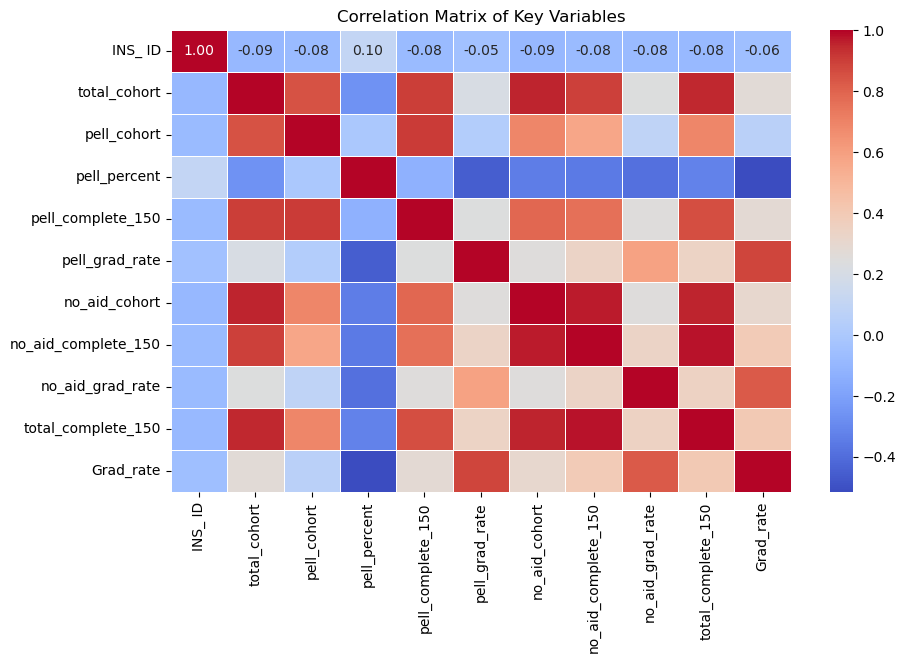

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Copy dataset for safety
df = PELL_GR_CLEANED.copy()

# Selecting only numeric columns for correlation
corr_matrix = df.select_dtypes(include=['number']).corr()

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Key Variables')

# Show the plot
plt.show()


### Key Variable Pairs to Analyze:

- **Pell Percentage vs. Pell Graduation Rate**  
  - To check if institutions with more Pell recipients tend to have higher/lower Pell graduation rates.

- **Institutional Control vs. Pell Graduation Rate**  
  - To compare public, private nonprofit, and private for-profit institutions.

- **HBCU vs. Pell Graduation Rate**  
  - To analyze differences between BCUs and PWIs.


### Visualization of Pell Grant Graduation Rates Across Institution Types

This code creates a grouped bar plot comparing Pell Grant graduation rates across different institution control types (Public vs Private) and institution levels (2-year vs 4-year). It uses the `seaborn` library for the bar plot and `matplotlib` for customization. The plot visually highlights how Pell Grant graduation rates vary across categories.

**Key Insights**:
- **Institution Control**: Public vs Private
- **Institution Level**: 2-year vs 4-year


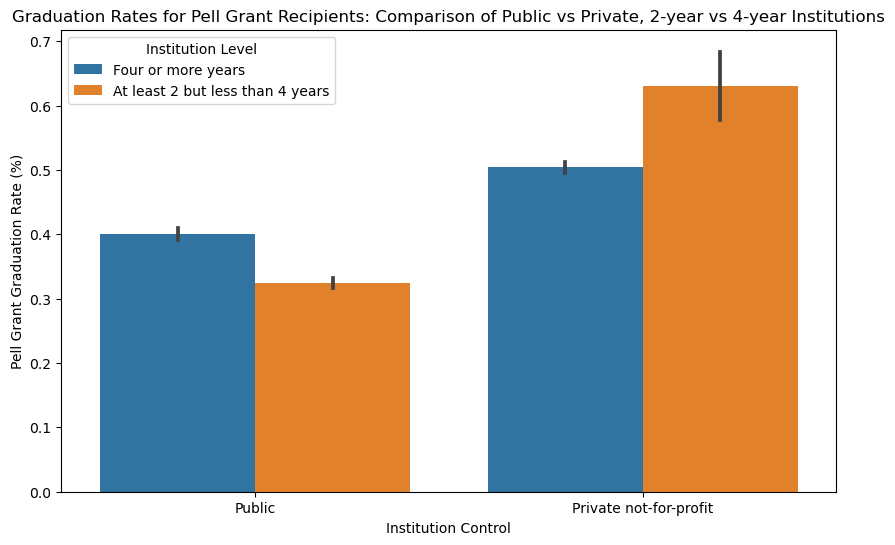

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a grouped bar plot comparing Pell Grant graduation rates across categories
plt.figure(figsize=(10,6))
sns.barplot(data=PELL_GR_CLEANED, x='CONTROL', y='pell_grad_rate', hue='IC_LEVEL')
plt.title('Graduation Rates for Pell Grant Recipients: Comparison of Public vs Private, 2-year vs 4-year Institutions')
plt.xlabel('Institution Control')
plt.ylabel('Pell Grant Graduation Rate (%)')
plt.legend(title='Institution Level')
plt.show()


In [172]:
print(PELL_GR_CLEANED["HBCU"].unique())


['0' '1']


### Visualizing Pell  Graduation Rates by Institutional Control and HBCU Status

This code creates a boxplot to compare Pell Grant recipients' graduation rates 
 across different institutional control types (Public, Private Nonprofit, Private For-Profit) 
 while distinguishing between HBCU and non-HBCU institutions. 
 The color palette is adjusted to match HBCU status (0 = dark red for non-HBCUs, 1 = dark blue for HBCUs).

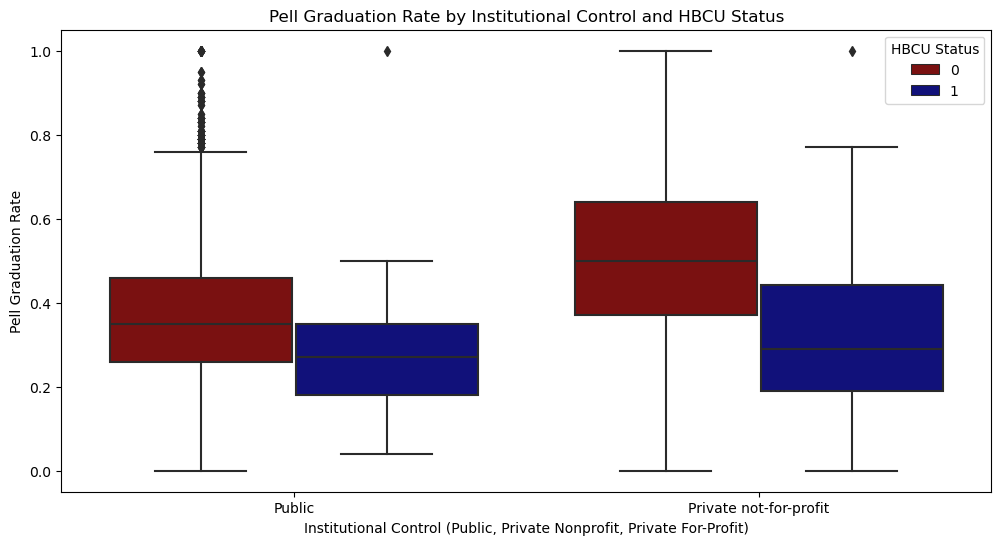

In [212]:
# Use matching string keys in the palette
palette = {"0": "darkred", "1": "darkblue"}

plt.figure(figsize=(12, 6))
sns.boxplot(data=PELL_GR_CLEANED, x="CONTROL", y="pell_grad_rate", hue="HBCU", palette=palette)
plt.title("Pell Graduation Rate by Institutional Control and HBCU Status")
plt.xlabel("Institutional Control (Public, Private Nonprofit, Private For-Profit)")
plt.ylabel("Pell Graduation Rate")
plt.legend(title="HBCU Status")
plt.show()


### Pell Grant Graduation Rate vs. Non-Pell Graduation Rate
This plot compares the graduation rates for Pell Grant recipients and Non-Pell Grant recipients across institutions.

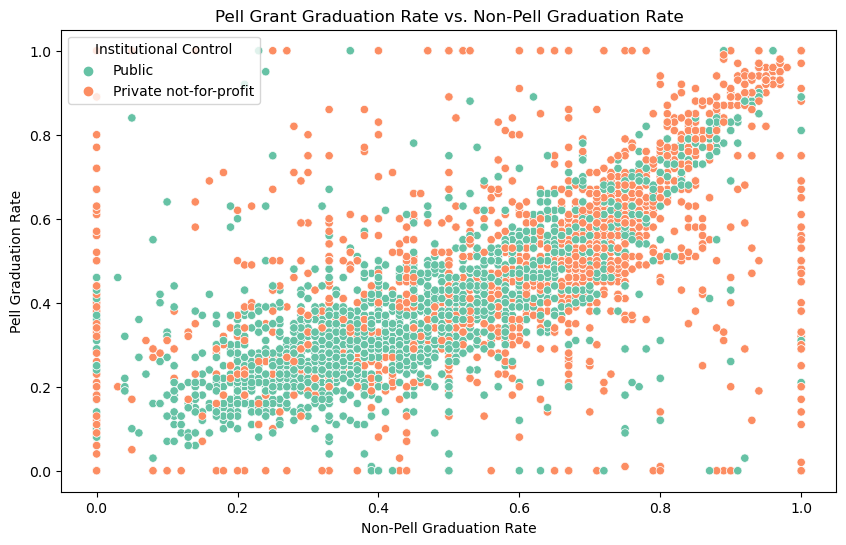

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Pell Grant Graduation Rate vs. Non-Pell Graduation Rate
plt.figure(figsize=(10,6))
sns.scatterplot(data=PELL_GR_CLEANED, x="no_aid_grad_rate", y="pell_grad_rate", hue="CONTROL", palette="Set2")
plt.title("Pell Grant Graduation Rate vs. Non-Pell Graduation Rate")
plt.xlabel("Non-Pell Graduation Rate")
plt.ylabel("Pell Graduation Rate")
plt.legend(title="Institutional Control")
plt.show()
